# Combinatorics 

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
plt.style.use("_classic_test_patch")
plt.style.use("bmh")

# What is our target in the stock market?

What are the possible outcomes of our trades? what is the possibility that we can reach +2% of return each week?

According to the prop firm challenges related to the stock market we need to reach ussually **+15%** to pass an evaluation process and therefore, approve some real capital like **10k, 25k, 100k, 200k** dollars in order to trade in the stock market, after completing this evaluation process they will pay you **70%** of your possitive returns if any **monthly or bi weekly**.

If we develop the ability to estimate an **often weekly return of +2%** we can pass this challenge around of **2-3 months** if we earn **+2% every week very often** to reach that **+15%**; however, there will be some weeks where we can't reach **+2%** or where we just lose and we need to reduce as much as possible these weekly losses in order to earn as much as we can. 

The power of randomness is considerably significant, it is made of divine forces which have a lot of weight when it come to analyse these markets, but we need to accompain this knowledge of combinatorics and randomness along with a professional technical analysis and good trading habits, in this manner we can pass these challenges.   

# Combinatorics and Last 2 Events Strategy

The Foreign Exchange market (FOREX) is opened from Monday to Friday especially in the morning of New York timezone the americans like me ussually trade, and we need to develop a strategy that place the probabilities in our favour, here is the strategy:

We start trading from Monday to Wednesday, After reaching x quantity in terms of percentage when we reach Thursday we place one last trade this day or another trade on Friday if needed. 

+ W is the weekly target which is +2%
+ T is the result until Thursday, it can be possitive or negative but no more or less than +- 1.5

**Risky approach:**
+ Win Win: $T + ( W - T ) + 0$
+ Win Lose: $T + ( W - T ) + 0$

**Remember that if we win the penultimate trade on Thursday we don't need to place a second one**

+ Lose Win: $T - ( W - T ) + ( \enspace W - [ \enspace T - (W - T ) \enspace] \enspace)$
+ Lose Lose: $T - ( W - T ) - ( \enspace W - [ \enspace T - (W - T ) \enspace ] \enspace )$  

**Conservative approach:**
+ Win Win = $T + ( \enspace \frac{W - T} {2} \enspace ) + ( \enspace \frac{W - T}{2} \enspace )$ The same risk twice since we won the first trade, half of the risk to reach W
<br><br>
+ Win Lose = $T + ( \enspace \frac{(W - T)}{2} \enspace ) - ( \enspace \frac{(W - T)}{2} \enspace )$ The same risk twice since we won the first trade
<br><br>
+ Lose Win = $T - ( \enspace \frac{( W - T )}{2} \enspace ) + ( \enspace W \enspace - \enspace [ \enspace T - ( \enspace \frac{( W - T )}{2} \enspace) \enspace] \enspace )$
<br><br>
+ Lose Lose = $T - ( \enspace \frac{( W - T )}{2} \enspace ) - ( \enspace W \enspace - \enspace [ \enspace T - ( \enspace \frac{( W - T )}{2} \enspace ) \enspace] \enspace )$
<br><br>
**Note: These algebraic statements are written based on reaching +2% every week, let me give you an example:**

Suppose we reach **+0.7%** until Thursday and we need to place 2 or one last trade, what is the possibility we reach **+2%?** 

+ Win Win: T + ( W - T ) + 0 = +2%
+ Win Lose: T + ( W - T ) + 0 = +2% Remeber that here we don't place a second trade, just one won trade

+ Lose Win: T - ( W - T ) + ( W - ( T - (W - T ) ) ) = +2%
+ Lose Lose: T - ( W - T ) - ( W - ( T - (W - T ) ) ) = -3.2%

As you can see, we have **3/4 scenarios where we earn +2%** and just **1/4 scenario where we lose -3.2%**, we increase the probabilities in our favour.

If we have a less desirable result on Thursday we take the conservative approach that reduces the amount lost in the Lose Lose scenario by cutting our target into a half. Let me give you an example:

Suppose we reach **-0.7%** until Thursday and we need to place 2 or one last trade, what is the possibility we reach **+2%?**

+ Win Win = T + ( (W - T) / 2 ) + ( (W - T) / 2 ) = +2%
+ Win Lose = T + ( (W - T) / 2 ) - ( (W - T) / 2 ) = -0.7%
    
+ Lose Win = T - ( ( W - T ) / 2 ) + ( W - (T - ( ( W - T ) / 2 ) ) ) = +2%
+ Lose Lose = T - ( ( W - T ) / 2 ) - ( W - (T - ( ( W - T ) / 2 ) ) ) = -6.1%

Here we still have a **bigger probability to earn +2% but 2/4 scenarios** while we have **1/4 scenarios of lossing -6.1%** and **1/4 scenario of losing -0.7%**, why we do this? 

Because if I reach Thursday with -0.7% and the next following trades are lost **applying the risky approach I will lose -8.8%**, so with the conservative approach **we reduce from -8.8% to -6.1%** in case we lose our last two trades but we exchanged that with the possibility to have 2/4 scenarios where we earn +2% instead of having 3/4 scenarios of earning +2% according to the risky approach. 

Of course, these formulas can be reduced to their minimum algebraic expression, for example, the Lose Lose event in the conservative approach:

+ Lose Lose = $T - ( \enspace \frac{( W - T )}{2} \enspace ) - ( \enspace W \enspace - \enspace [ \enspace T - ( \enspace \frac{( W - T )}{2} \enspace ) \enspace] \enspace )$
<br><br>
can be reduced or surpressed as:
<br><br>
+ $3T - 2W$

# Function of the last 2 Trades in the Stock Market

In [2]:
def four_outcomes(result_thursday, weekly_target): # We need to introduce our Thursday results and Weekly target
    
    T = result_thursday
    W = weekly_target
    
    # For the risky version

    G_G = T + ( W - T ) 
    G_P = T + ( W - T )

    P_G = T - ( W - T ) + ( W - ( T - (W - T ) ) )
    P_P = T - ( W - T ) - ( W - ( T - (W - T ) ) )
    
    # Establishing the two risks in the risky approach
    risk_penultimate = ( W - T )  
    last_risk =  ( W - ( T - (W - T ) ) )

    # Now for the conservative version

    G_G_conservative = T + ( (W - T) / 2 ) + ( (W - T) / 2 ) # The same risk twice since we won the first trade
    G_P_conservative = T + ( (W - T) / 2 ) - ( (W - T) / 2 )
    
    P_G_conservative = T - ( ( W - T ) / 2 ) + ( W - (T - ( ( W - T ) / 2 ) ) )
    P_P_conservative = T - ( ( W - T ) / 2 ) - ( W - (T - ( ( W - T ) / 2 ) ) )
    
    # Establishing the two risks in the conservative approach
    risk_penultimate_conservative = ( ( W - T ) / 2 ) 
    last_risk_conservative =  ( W - (T - ( ( W - T ) / 2 ) ) )

    # Create a Dataframe with the risky and conservative outcomes

    # risky
    risky_outcomes = [G_G, G_P, P_G, P_P]
    penultimate_risk = [risk_penultimate, risk_penultimate, risk_penultimate, risk_penultimate]
    last_risk = [0, 0, last_risk, last_risk]

    # conservative
    conservative_outcomes = [G_G_conservative, G_P_conservative, P_G_conservative, P_P_conservative]
    
    penultimate_risk_conservative = [risk_penultimate_conservative, 
                                     risk_penultimate_conservative, 
                                     risk_penultimate_conservative,
                                     risk_penultimate_conservative]

    last_risk_conservative = [risk_penultimate_conservative, 
                              risk_penultimate_conservative, 
                              last_risk_conservative, 
                              last_risk_conservative]

    dictionary = {"Risky outcomes" : risky_outcomes, 
          "Penultimate risk": penultimate_risk, 
          "Last risk": last_risk,
          "Conservative outcomes": conservative_outcomes,
          "Penultimate risk conservative": penultimate_risk_conservative,
          "Last risk conservative": last_risk_conservative}
    
    # creating a dataframe
    df = pd.DataFrame(dictionary, index = ["W/W", "W/L", "L/W", "L/L"])
    
    return df

In [3]:
four_outcomes(0.5, 2)

,Risky outcomes,Penultimate risk,Last risk,Conservative outcomes,Penultimate risk conservative,Last risk conservative
W/W,2.0,1.5,0.0,2.0,0.75,0.75
W/L,2.0,1.5,0.0,0.5,0.75,0.75
L/W,2.0,1.5,3.0,2.0,0.75,2.25
L/L,-4.0,1.5,3.0,-2.5,0.75,2.25


# Constructing the X and Y values of the functions that varies from +2%

In [4]:
# y axis
L_L_risky = []
W_L_conservative = []
L_L_conservative = []

# x axis
Thursday_result = []

result_thursday_increase = -1.5 # this is the result of the thursday that is going to change


while result_thursday_increase <= 1.6:
    
    # Defining Variables 
    W = 2 # Weekly target
    T = result_thursday_increase # Result until Thursday
    
    # Establishing the two terms with two risks both in the risky and conservative approach
    
    #Risky
    risk_penultimate = ( W - T )  
    last_risk =  ( W - ( T - (W - T ) ) )
    
    #Conservative
    risk_penultimate_conservative = ( W - T ) / 2  
    last_risk_conservative =  ( W - ( T - ( ( W - T ) / 2 ) ) )

    # Defining our functions
    
    # For the risky version L/L
    P_P = T - risk_penultimate - last_risk

    # Now for the conservative part
    
    G_P_conservative = T + ( ( W - T ) / 2 ) - ( ( W - T ) / 2 ) # the same risk twice

    P_P_conservative = T - ( ( W - T ) / 2 ) - ( W - ( T - ( ( W - T ) / 2 ) ) )

    # Appending values for this current iteration
    
    # y axis
    L_L_risky.append(round(P_P, 2))
    W_L_conservative.append(round(G_P_conservative, 2))
    L_L_conservative.append(round(P_P_conservative, 2))
    
    # x axis
    Thursday_result.append(round(result_thursday_increase, 2))
    
    # increasing result Thursday by 0.05
    result_thursday_increase += 0.05
    
# Creating the dictionary for our dataframe
x_y = {"Thursday_result": Thursday_result,
       "W_L_conservative": W_L_conservative, 
       "L_L_conservative": L_L_conservative, 
       "L_L_risky": L_L_risky}

three_functions = pd.DataFrame(x_y)



# Visualizing our functions

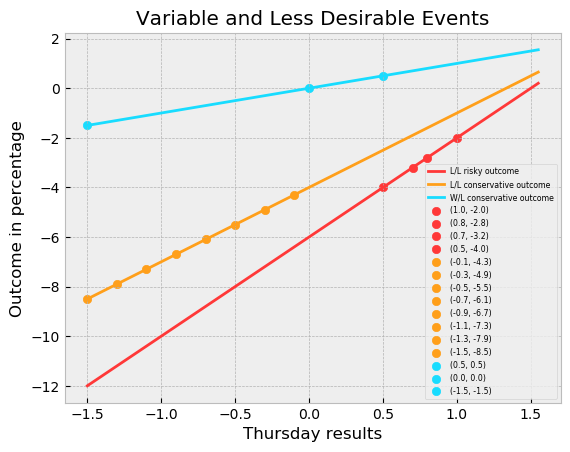

In [5]:
# Three Functions
plt.plot(Thursday_result, L_L_risky, color = "#ff3838", label = "L/L risky outcome")
plt.plot(Thursday_result, L_L_conservative, color = "#ff9f1a", label = "L/L conservative outcome")
plt.plot(Thursday_result, W_L_conservative, color = "#18dcff", label = "W/L conservative outcome")

# Ordered Pairs LL risky function
for h_axis in [1.0, 0.8, 0.7, 0.5]:
    
    x_zero_dot_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "Thursday_result"])

    y_zero_dot_LL_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "L_L_risky"])
    
    plt.scatter(x_zero_dot_risky, 
                y_zero_dot_LL_risky, 
                marker='o', color='#ff3838', 
                label = f"({x_zero_dot_risky}, {y_zero_dot_LL_risky})")

# Ordered Pairs LL "conservative" function
for h_axis in [-0.1, -0.3, -0.5, -0.7, -0.9, -1.1, -1.3, -1.5]:
    
    x_zero_dot_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "Thursday_result"])

    y_zero_dot_LL_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "L_L_conservative"])
    
    plt.scatter(x_zero_dot_risky, 
                y_zero_dot_LL_risky, 
                marker='o', color='#ff9f1a', 
                label = f"({x_zero_dot_risky}, {y_zero_dot_LL_risky})")

# Ordered Pairs WL "conservative" function
for h_axis in [0.5, 0.0, -1.5]:
    
    x_zero_dot_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "Thursday_result"])

    y_zero_dot_LL_risky = float(three_functions.loc[three_functions["Thursday_result"] == h_axis, "W_L_conservative"])
    
    plt.scatter(x_zero_dot_risky, 
                y_zero_dot_LL_risky, 
                marker='o', color='#18dcff', 
                label = f"({x_zero_dot_risky}, {y_zero_dot_LL_risky})")

plt.title("Variable and Less Desirable Events")
plt.xlabel("Thursday results")
plt.ylabel("Outcome in percentage")
plt.legend(fontsize = 5.64)

plt.show()

***It turns out that the only events where we don't earn +2% both on the risky and conservative approaches can be visualized with three different functions which are the less likely and less desirable to occur, and if we plot a line chart we encounter this picture. According to this chart it is recommendable to allow us the risky approach If we earn => +0.5% until Thursday.***

We need to make use of a good technical analysis using smart money concepts and interbank price delivery algorithm in order to reduce the possibility to fall into one of these three functions. **But there is something more, what is the sequence of our trades? How many trades should I win if I place 5 trades from Monday to Thursday?** These questions can be answered with combinatorics theory.

# Combinatorics

In [6]:
number_trades = 5 # These are the number of trades from Monday to Thursday
counting = list(itertools.product(["W", "L"], repeat = number_trades))

In [7]:
len(counting)

32

In [8]:
counting # These are the permutations with repeat it is like N ** K, two outcomes in 5 spaces

[('W', 'W', 'W', 'W', 'W'),
 ('W', 'W', 'W', 'W', 'L'),
 ('W', 'W', 'W', 'L', 'W'),
 ('W', 'W', 'W', 'L', 'L'),
 ('W', 'W', 'L', 'W', 'W'),
 ('W', 'W', 'L', 'W', 'L'),
 ('W', 'W', 'L', 'L', 'W'),
 ('W', 'W', 'L', 'L', 'L'),
 ('W', 'L', 'W', 'W', 'W'),
 ('W', 'L', 'W', 'W', 'L'),
 ('W', 'L', 'W', 'L', 'W'),
 ('W', 'L', 'W', 'L', 'L'),
 ('W', 'L', 'L', 'W', 'W'),
 ('W', 'L', 'L', 'W', 'L'),
 ('W', 'L', 'L', 'L', 'W'),
 ('W', 'L', 'L', 'L', 'L'),
 ('L', 'W', 'W', 'W', 'W'),
 ('L', 'W', 'W', 'W', 'L'),
 ('L', 'W', 'W', 'L', 'W'),
 ('L', 'W', 'W', 'L', 'L'),
 ('L', 'W', 'L', 'W', 'W'),
 ('L', 'W', 'L', 'W', 'L'),
 ('L', 'W', 'L', 'L', 'W'),
 ('L', 'W', 'L', 'L', 'L'),
 ('L', 'L', 'W', 'W', 'W'),
 ('L', 'L', 'W', 'W', 'L'),
 ('L', 'L', 'W', 'L', 'W'),
 ('L', 'L', 'W', 'L', 'L'),
 ('L', 'L', 'L', 'W', 'W'),
 ('L', 'L', 'L', 'W', 'L'),
 ('L', 'L', 'L', 'L', 'W'),
 ('L', 'L', 'L', 'L', 'L')]

We are going to sort these values to get the combinations with repetition seeing how many times each same permutation with repetition occurs.

In [9]:
table = []

for i in counting:
    #print(sorted(i))
    table.append(sorted(i))

In [10]:
table

[['W', 'W', 'W', 'W', 'W'],
 ['L', 'W', 'W', 'W', 'W'],
 ['L', 'W', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'W', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'W', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'L', 'W'],
 ['L', 'W', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'L', 'W'],
 ['L', 'L', 'W', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'L', 'W'],
 ['L', 'L', 'L', 'W', 'W'],
 ['L', 'L', 'L', 'L', 'W'],
 ['L', 'L', 'L', 'L', 'W'],
 ['L', 'L', 'L', 'L', 'L']]

In [11]:
table_counted = pd.Series(table, name = "table")
combinations = table_counted.value_counts()

In [12]:
combinations # it turns out that some outcomes are more likely to occur, especially when we earn or lose just 2 trades

[L, L, W, W, W]    10
[L, L, L, W, W]    10
[L, W, W, W, W]     5
[L, L, L, L, W]     5
[W, W, W, W, W]     1
[L, L, L, L, L]     1
Name: table, dtype: int64

The results returned previously are just the combinations with repetition of two possible outcomes per trade N = 2 with five trades, K = 5 places but here we don't apply the binomial coefficient but another formula, The formula of combinations with repetition which is:

# $\frac{(N - 1 + K)!}{(N - 1)! \enspace K!}$ <-- Here we are considering the Separators between 2 possible outcomes per trade Win or Loss which is 1 or N - 1 

This is the same as the results below with the itertools module, this time we wanted to know the number of occurrences per permutation to see the probability distribution of this random variable.

In [13]:
list(itertools.combinations_with_replacement(["L", "W"], r = 5)) 

[('L', 'L', 'L', 'L', 'L'),
 ('L', 'L', 'L', 'L', 'W'),
 ('L', 'L', 'L', 'W', 'W'),
 ('L', 'L', 'W', 'W', 'W'),
 ('L', 'W', 'W', 'W', 'W'),
 ('W', 'W', 'W', 'W', 'W')]

In [14]:
table_counted.value_counts(normalize = True) # If we normalize the values we can see the possibilities below

[L, L, W, W, W]    0.31250
[L, L, L, W, W]    0.31250
[L, W, W, W, W]    0.15625
[L, L, L, L, W]    0.15625
[W, W, W, W, W]    0.03125
[L, L, L, L, L]    0.03125
Name: table, dtype: float64

In [15]:
combinations = table_counted.value_counts(normalize = True) # Storing the normalized Series in a variable

In [16]:
combinations.index = ['LLWWW', 'LLLWW','LWWWW', 'LLLLW','WWWWW', 'LLLLL'] # We want to see str not lists on the x axis
combinations = combinations.sort_index() # We need to sort the index to see clearly the distribution

In [17]:
combinations.index

Index(['LLLLL', 'LLLLW', 'LLLWW', 'LLWWW', 'LWWWW', 'WWWWW'], dtype='object')

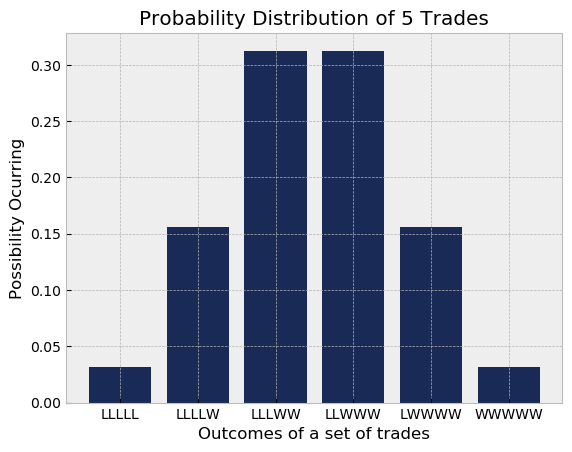

In [18]:
# Visualizing the probability distribution of 5 trades if we keep the equaly likey outcome of 50%

plt.bar(combinations.index, combinations, color = "#192a56")
plt.title("Probability Distribution of 5 Trades")
plt.xlabel("Outcomes of a set of trades")
plt.ylabel("Possibility Ocurring")
plt.show()

**We have 6 possible events when I place 5 trades from monday to Thrusday, for each event we can have an order of arrangements with 5 trades assigning risk randomly.** Some events are more likely than others.

# In how many events do we lose in our last two trades making the less desirable functions a reality if we place 7 trades per week? 

In [30]:
every_arrangement = list(itertools.product(["W", "L"], repeat = 7))
len(every_arrangement) #it is 2^7

128

We are going to see how many occurrences do we have when we lose on ***Thursday*** and how many on ***Thursday and Friday.*** 

In [53]:
thursday_lost = 0
weeks_thursday_lost = []

thursday_friday_lost = 0
last_two_lost = []

for permutation in range( len(every_arrangement) ):
    
    if every_arrangement[permutation][-2] == "L":
        thursday_lost += 1
        weeks_thursday_lost.append(every_arrangement[permutation])
        
    if every_arrangement[permutation][-2] == "L" and every_arrangement[permutation][-1] == "L":
        thursday_friday_lost += 1
        last_two_lost.append(every_arrangement[permutation])
        

In [49]:
thursday_lost

64

In [55]:
thursday_friday_lost

32

In [50]:
weeks_thursday_lost

[('W', 'W', 'W', 'W', 'W', 'L', 'W'),
 ('W', 'W', 'W', 'W', 'W', 'L', 'L'),
 ('W', 'W', 'W', 'W', 'L', 'L', 'W'),
 ('W', 'W', 'W', 'W', 'L', 'L', 'L'),
 ('W', 'W', 'W', 'L', 'W', 'L', 'W'),
 ('W', 'W', 'W', 'L', 'W', 'L', 'L'),
 ('W', 'W', 'W', 'L', 'L', 'L', 'W'),
 ('W', 'W', 'W', 'L', 'L', 'L', 'L'),
 ('W', 'W', 'L', 'W', 'W', 'L', 'W'),
 ('W', 'W', 'L', 'W', 'W', 'L', 'L'),
 ('W', 'W', 'L', 'W', 'L', 'L', 'W'),
 ('W', 'W', 'L', 'W', 'L', 'L', 'L'),
 ('W', 'W', 'L', 'L', 'W', 'L', 'W'),
 ('W', 'W', 'L', 'L', 'W', 'L', 'L'),
 ('W', 'W', 'L', 'L', 'L', 'L', 'W'),
 ('W', 'W', 'L', 'L', 'L', 'L', 'L'),
 ('W', 'L', 'W', 'W', 'W', 'L', 'W'),
 ('W', 'L', 'W', 'W', 'W', 'L', 'L'),
 ('W', 'L', 'W', 'W', 'L', 'L', 'W'),
 ('W', 'L', 'W', 'W', 'L', 'L', 'L'),
 ('W', 'L', 'W', 'L', 'W', 'L', 'W'),
 ('W', 'L', 'W', 'L', 'W', 'L', 'L'),
 ('W', 'L', 'W', 'L', 'L', 'L', 'W'),
 ('W', 'L', 'W', 'L', 'L', 'L', 'L'),
 ('W', 'L', 'L', 'W', 'W', 'L', 'W'),
 ('W', 'L', 'L', 'W', 'W', 'L', 'L'),
 ('W', 'L', 

In [56]:
last_two_lost

[('W', 'W', 'W', 'W', 'W', 'L', 'L'),
 ('W', 'W', 'W', 'W', 'L', 'L', 'L'),
 ('W', 'W', 'W', 'L', 'W', 'L', 'L'),
 ('W', 'W', 'W', 'L', 'L', 'L', 'L'),
 ('W', 'W', 'L', 'W', 'W', 'L', 'L'),
 ('W', 'W', 'L', 'W', 'L', 'L', 'L'),
 ('W', 'W', 'L', 'L', 'W', 'L', 'L'),
 ('W', 'W', 'L', 'L', 'L', 'L', 'L'),
 ('W', 'L', 'W', 'W', 'W', 'L', 'L'),
 ('W', 'L', 'W', 'W', 'L', 'L', 'L'),
 ('W', 'L', 'W', 'L', 'W', 'L', 'L'),
 ('W', 'L', 'W', 'L', 'L', 'L', 'L'),
 ('W', 'L', 'L', 'W', 'W', 'L', 'L'),
 ('W', 'L', 'L', 'W', 'L', 'L', 'L'),
 ('W', 'L', 'L', 'L', 'W', 'L', 'L'),
 ('W', 'L', 'L', 'L', 'L', 'L', 'L'),
 ('L', 'W', 'W', 'W', 'W', 'L', 'L'),
 ('L', 'W', 'W', 'W', 'L', 'L', 'L'),
 ('L', 'W', 'W', 'L', 'W', 'L', 'L'),
 ('L', 'W', 'W', 'L', 'L', 'L', 'L'),
 ('L', 'W', 'L', 'W', 'W', 'L', 'L'),
 ('L', 'W', 'L', 'W', 'L', 'L', 'L'),
 ('L', 'W', 'L', 'L', 'W', 'L', 'L'),
 ('L', 'W', 'L', 'L', 'L', 'L', 'L'),
 ('L', 'L', 'W', 'W', 'W', 'L', 'L'),
 ('L', 'L', 'W', 'W', 'L', 'L', 'L'),
 ('L', 'L', 

What is the proportion? between these two scenarios?

In [61]:
( thursday_lost / len(every_arrangement) ) * 100

50.0

In [62]:
( thursday_friday_lost /len(every_arrangement) ) * 100

25.0

**We can conclude that there is 50% likely outcome of losing on Thursdays our trades and 25% of losing both last trades.**

# Creating the dataframes to arrange 5 different risks in 6 possible events.

In [19]:
number_trades = 5 # Number of trades from Monday to Thursday
list_risks = [0.10, 0.30, 0.70, 0.30, 0.10] # This is an example of a list of 5 risks in each one of the 6 events

def permutations_sum(number_trades, list_risks):
    
    for event in range(number_trades + 1): # It iterates until 4 because the last number is exclusive

        # Creating the Probability distribution of a random variable with 5 trades each one with 50% chance of winning. 
        counting = list(itertools.product(["W", "L"], repeat = number_trades)) # permutations with repetition 2 ** N trades

        table = []
        for i in counting: # Sorting the values of the 5 possible arrangements
            #print(sorted(i))
            table.append(sorted(i))

        # Creating a pandas Series and normalizing it 
        table_counted = pd.Series(table, name = "table")
        combinations = table_counted.value_counts(normalize = True)

        # Storing the list of each probability distribution to use it later when we create the dataframe, these will be columns
        permutations_index = combinations.index 

        #Creating the index to a list of 6 outcomes for readability in our bars, We want strs not lists
        combinations_index = ['LLWWW', 'LLLWW','LWWWW', 'LLLLW','WWWWW', 'LLLLL']

        #------------------------------------------------------------------------------------------------

        # Creating the arrangement of N trades until Thursday
        permutations = list(itertools.permutations(list_risks, r = number_trades))
        
        # Permutations of 5 risks in 5 trades are 120 possible arrangements

        # Creating a dataframe with 120 arrangements in 1 of 6 events, each event has 5 slots
        
        # Here we are going to make use of the list of lists we stored above and we are going to iterate over 6 events
        df_permutations = pd.DataFrame(data = permutations, columns = permutations_index[event]) 

        # Adding the corresponding sign if it was a "lost or Won" trade
        for column in range(number_trades):

            if df_permutations.iloc[:, column].name == "L": # the .name attribute is for calling the name of a series
                df_permutations.iloc[:, column] = -df_permutations.iloc[:, column]

        # Adding a new column with the sum of all trades
        df_permutations["Sum"] = df_permutations.sum(axis = 1)

        # Not all the float numbers in the Sum column are exactly the same 
        # and we need to make them the same, those same occurences rounding the prices
        
        df_permutations["Sum"] = round(df_permutations["Sum"], 2) #Rounded to 2 decimals to make them the same
        df_permutations["Sum"] = df_permutations["Sum"].astype(str) #Changing the type to str for the X axis in our bars

        # Counting the number of occurrences in the Sum column just created
        distribution = df_permutations.groupby("Sum").size()

        # Creating the visualization bars 

        distribution = distribution.reset_index() # Reseting the index to pass the index into a new column
        #Creating the proportion column using the rule of 3 with the Z or directly proportion approach
        distribution["Proportion"] = (distribution[0] * 100) / distribution[0].sum() 

        # Using matplotlib code to create a bar chart, just one per event, and we have 6
        
        # Iloc 2 is the third column, the proportion just created
        plt.bar(distribution["Sum"], distribution.iloc[:, 2], color = "#f53b57") 
        plt.title(f"Permutations {combinations_index[event]} Trades")
        plt.xlabel("Results in %")
        plt.ylabel("Probability of the Results in %")
        plt.show()

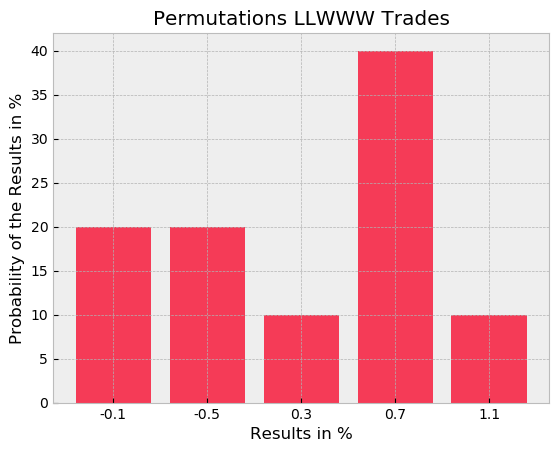

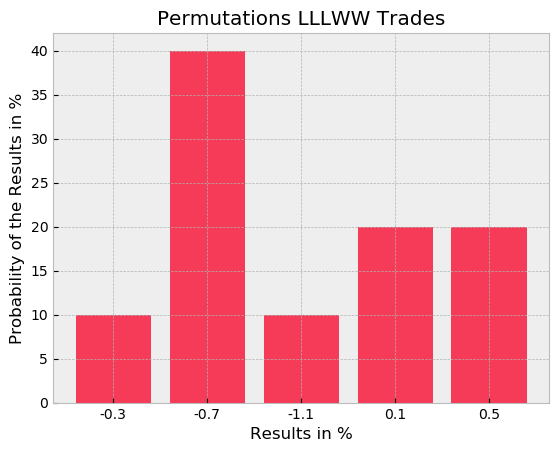

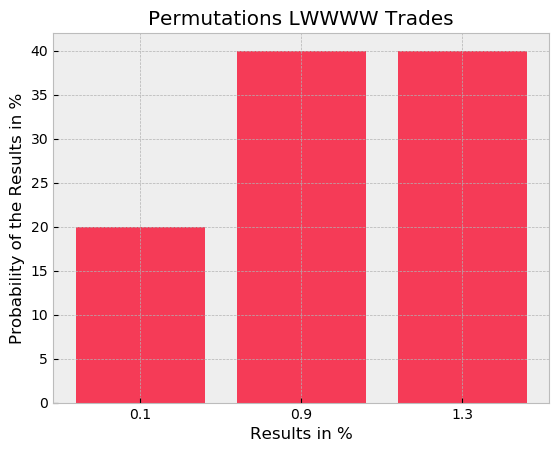

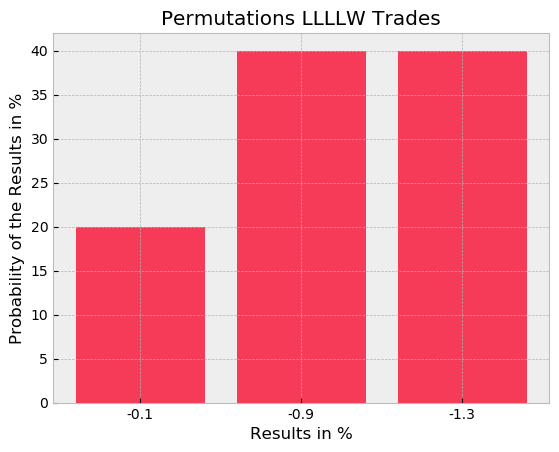

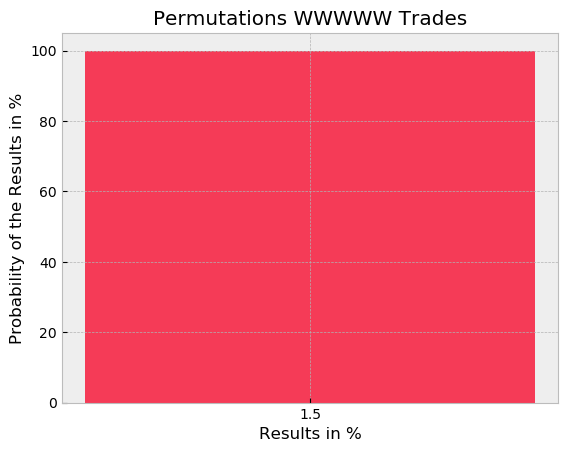

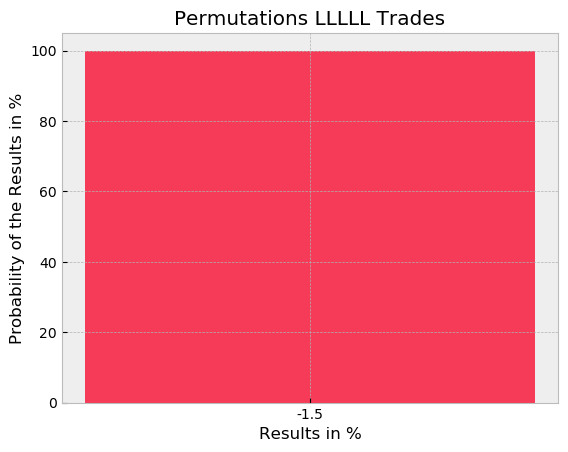

In [20]:
permutations_sum(number_trades, list_risks)

**It is important to place higher risk on those trades where we are more certain that we are going to win them and place lower risk for those trades which are less likely of winning.** 